In [1]:
# https://python-graph-gallery.com/web-highlighted-lineplot-with-faceting/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from common import (
    read_workout_dfs, 
    load_racing_sans_one_font,
    load_roboto_condensed_font,
    MY_COLORS
)

In [3]:
dfs = read_workout_dfs()

In [4]:
df_months = []
for year, df in dfs.items():
    df["month"] = df["WorkoutDay"].apply(lambda date: date.split("-")[1])
    df_month = df.groupby("month", as_index=False).agg({"TimeTotalInHours": "sum"})
    df_month["year"] = year
    df_months.append(df_month)

df_months = pd.concat(df_months)

In [5]:
def fill_missing_months(df):
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    dfs_filled = []
    for year in df["year"].unique():
        df_year = df[df["year"] == year]
        for month in months:
            if month not in df_year["month"].values:
                df_month = pd.DataFrame({"month": [month], "TimeTotalInHours": [0], "year": [year]})
                df_year = pd.concat([df_year, df_month])
        dfs_filled.append(df_year)
    return pd.concat(dfs_filled).sort_values(["year", "month"])

df_months = fill_missing_months(df_months)
df_months.head()

,month,TimeTotalInHours,year
0,01,0.0,2021
0,02,0.0,2021
0,03,0.0,2021
0,04,0.0,2021
0,05,0.0,2021


In [6]:
df_months.tail()

,month,TimeTotalInHours,year
7,08,43.128464,2024
8,09,42.206400,2024
9,10,17.393917,2024
10,11,29.729608,2024
11,12,11.500559,2024


In [7]:
years = df_months["year"].unique()
year_to_color = {
    2021: MY_COLORS["Medium Midnight Blue"], 
    2022: MY_COLORS["Light Blue"],
    2023: MY_COLORS["Bright Orange"],
    2024: MY_COLORS["Slightly Darker Orange"]
}
month_names = {
    "01": "Jan",
    "02": "Feb",    
    "03": "Mar",
    "04": "Apr",    
    "05": "May",
    "06": "Jun",    
    "07": "Jul",
    "08": "Aug",    
    "09": "Sep",
    "10": "Oct",    
    "11": "Nov",
    "12": "Dec"
}

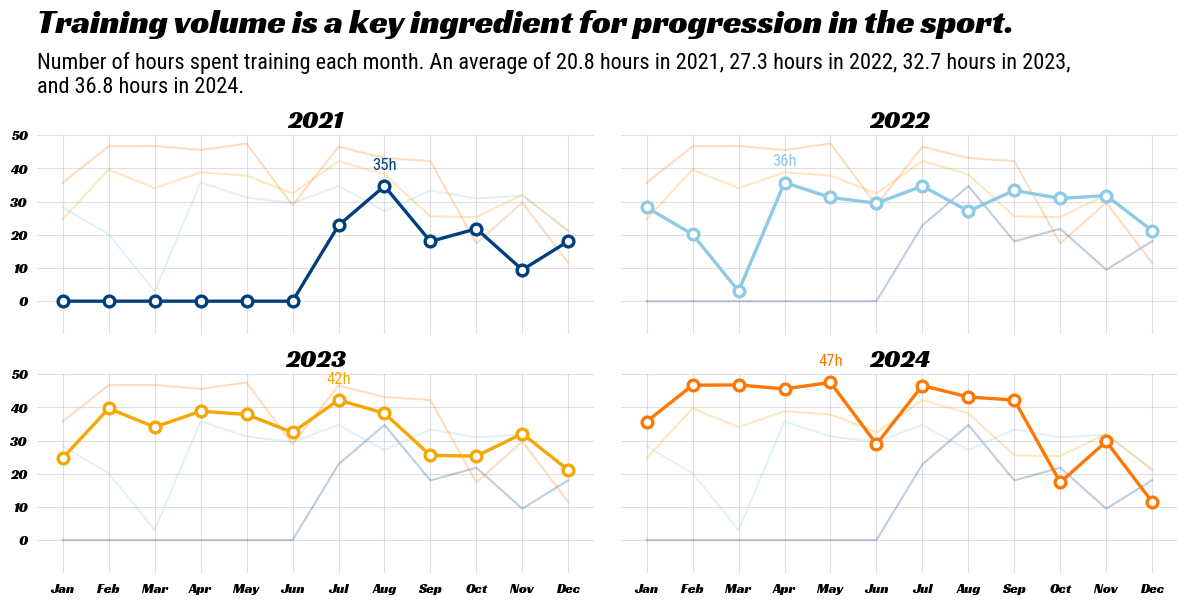

In [12]:
title_font = load_racing_sans_one_font()
body_font = load_roboto_condensed_font()

def plot_year(year_hl, df_months, ax):
    for year in years:
        df_year = df_months[df_months["year"] == year]
        x = df_year["month"].to_list()
        y = df_year["TimeTotalInHours"].to_list()

        if year == year_hl:
            ax.plot(x, y, color=year_to_color[year], lw=2.4, zorder=10)
            ax.scatter(x, y, fc="w", color=year_to_color[year], s=60, lw=2.4, zorder=12)
            
            # Add peak hours annotation
            peak_hours = max(y)
            peak_month_idx = y.index(peak_hours)
            peak_month = x[peak_month_idx]
            ax.annotate(
                f"{round(peak_hours)}h",
                xy=(peak_month, peak_hours + 1),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontproperties=body_font,
                fontsize=12,
                color=year_to_color[year]
            )
        else:
            ax.plot(x, y, color=year_to_color[year], lw=1.5, alpha=0.25)

    ax.tick_params(bottom=False, left=False)
    ax.set_xticks(x, month_names.values(), fontsize=12, fontproperties=title_font)
    ax.set_yticks(ax.get_yticks(), labels=[""] + [f"{int(y)}" for y in ax.get_yticks()[1:]], fontsize=12, fontproperties=title_font)
    ax.set_frame_on(False)
    ax.grid(which="minor", lw=0.4, alpha=0.4)
    ax.grid(which="major", lw=0.8, alpha=0.4)
    ax.set_title(year_hl, fontproperties=title_font, fontsize=18)


fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 6))
for idx, (ax, year) in enumerate(zip(axes.ravel(), years)):
    plot_year(year, df_months, ax)

fig.subplots_adjust(wspace=0.05, left=0.025, right=0.975, bottom=0.09, top=0.82)
fig.suptitle(
    "Training volume is a key ingredient for progression in the sport.", 
    x=0.025, 
    y=1.03,
    fontsize=24, 
    horizontalalignment="left", 
    fontproperties=title_font
)

avg_2021 = df_months[(df_months['TimeTotalInHours'] > 0) & (df_months['year'] == 2021)]['TimeTotalInHours'].mean()
avg_2022 = df_months[(df_months['TimeTotalInHours'] > 0) & (df_months['year'] == 2022)]['TimeTotalInHours'].mean()
avg_2023 = df_months[(df_months['TimeTotalInHours'] > 0) & (df_months['year'] == 2023)]['TimeTotalInHours'].mean()
avg_2024 = df_months[(df_months['TimeTotalInHours'] > 0) & (df_months['year'] == 2024)]['TimeTotalInHours'].mean()

fig.text(
    x=0.025,
    y=0.96,
    s=f"Number of hours spent training each month. An average of {avg_2021:.1f} hours in 2021, {avg_2022:.1f} hours in 2022, {avg_2023:.1f} hours in 2023, \nand {avg_2024:.1f} hours in 2024.", 
    fontsize=16, 
    verticalalignment="top",
    horizontalalignment="left", 
    fontproperties=body_font
)

plt.savefig('../figures/multi_lineplot.png', dpi=500, bbox_inches='tight')
plt.show()